### <font color='red'> Superstore Marketing Campaign. </font>

#### A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only $499 which is $999 on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.

#### Our data has 2240 values and 22 columns, Here we will use the "superstore_data.csv" database that has been made available for use, below you will see an analysis of the data, the processing of that data and the use of machine learning classification models to achieve our goal.

#### Importing Libraries.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
from itertools import combinations
from scipy import stats


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

# from yellowbrick.classifier import ConfusionMatrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



from sklearn .linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA




from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

## <font color='blue'> 1. Importing Dataset. </font>

#### Here we are reading the database using the name "df" in the variable.

In [2]:
df=pd.read_csv("marketing_campaign.csv",sep=";")


#### Here we can see that we have categorical and continuous variables, we can also see that we have this column ID that will probably not be used, we can also see that we have some null values.

#### Here the explanation about the variables:

- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- ID - Unique ID of each customer
- Year_Birth - Age of the customer
- Complain - 1 if the customer complained in the last 2 years
- Dt_Customer - date of customer's enrollment with the company
- Education - customer's level of education
- Marital - customer's marital status
- Kidhome - number of small children in customer's household
- Teenhome - number of teenagers in customer's household
- Income - customer's yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company's website
- NumWebVisitsMonth - number of visits to company's website in the last month
- Recency - number of days since the last purchase

In [3]:
pd.set_option('display.max_columns', None)
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
(df.isnull().sum()/len(df))

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010714
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

#### Let's fill our null values ​​of the Income variable with Mode.

In [8]:
df['Income']=df['Income'].fillna(df['Income'].mode()[0])

In [9]:
(df.isnull().sum()/len(df))

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64

In [10]:
#converting to date time object
df.Dt_Customer = df.Dt_Customer.apply(lambda x : pd.to_datetime(str(x)))
df.Dt_Customer.describe(datetime_is_numeric=True)

count                             2240
mean     2013-07-10 10:01:42.857142784
min                2012-07-30 00:00:00
25%                2013-01-16 00:00:00
50%                2013-07-08 12:00:00
75%                2013-12-30 06:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

In [11]:
# Extracting registration year from the date
df["Reg_year"] = df["Dt_Customer"].apply(lambda x: x.year)

# Extracting registration month from the date
df["Reg_month"] = df["Dt_Customer"].apply(lambda x: x.month)

# Extracting registration week from the date
df["Reg_week"] = df["Dt_Customer"].apply(lambda x: x.day // 7)

In [12]:
df = df.drop(['Z_CostContact', 'Z_Revenue','ID', 'Dt_Customer','Complain'], axis = 1)


In [13]:
df["Marital_Status"] = df["Marital_Status"].replace(["YOLO", "Alone", "Absurd","Divorced","Widow"], "Single")
df["Marital_Status"] = df["Marital_Status"].replace(["Together"], "Married")


In [14]:
df["Education"] = df["Education"].replace("2n Cycle", "Master")

In [15]:
df["Total_Amount_Spent"] = df[
    [
        "MntWines",
        "MntFruits",
        "MntMeatProducts",
        "MntFishProducts",
        "MntSweetProducts",
        "MntGoldProds",
    ]
].sum(axis=1)

## <font color='blue'> 2. Data Analysis. </font>

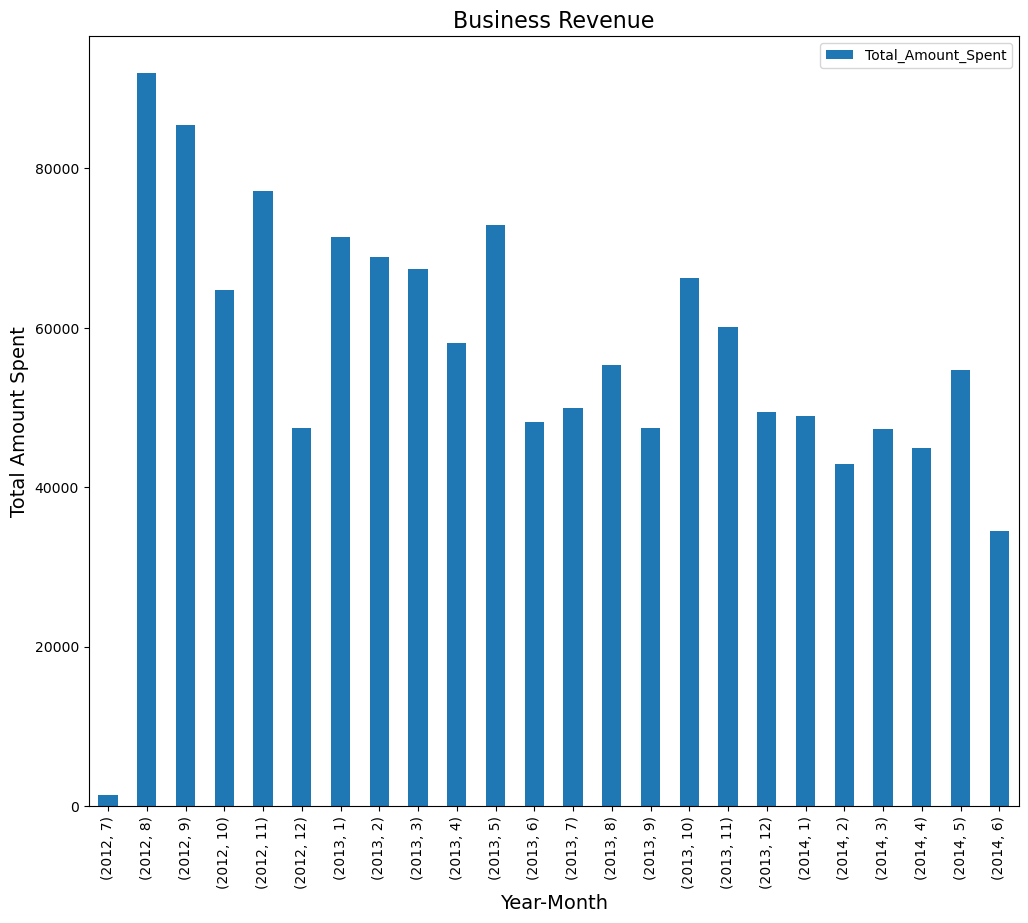

In [16]:
# Generate the pivot table
pivot_table = pd.pivot_table(
    data=df,
    index=["Reg_year", "Reg_month"],
    values="Total_Amount_Spent",
    aggfunc=np.sum,
)



# Create the bar graph
ax = pivot_table.plot(kind="bar", figsize=(12, 10))
ax.set_xlabel("Year-Month", fontsize=14)
ax.set_ylabel("Total Amount Spent", fontsize=14)
ax.set_title("Business Revenue", fontsize=16)

# Save the plot as a PNG image with transparent background
plt.savefig("business_revenue.png", dpi=300, transparent=True)

In [17]:
df = df[(df['Reg_month'] != 7) & (df['Reg_year'] != 2012)]

#### Verifying the correlation between our variables.
- We can see that we have some correlations above 0.60, so let's remove the MntWines and MntMeatProducts variables

#### Categorical Variables

#### Looking at our categorical variables we managed to get some views, most of our data are from graduates, although we have a lot of data from singles, they are usually married/cohabiting clients, the data is well divided between those who have children and those who do not, we can see that the greater the number of purchases in the month, the less data we have, it is also interesting to see that customers usually visit the site an average of 7 times a month, when we look at the Complain variable we see that we have few complaints, and looking at our variable target we can see that most of the data is negative response.

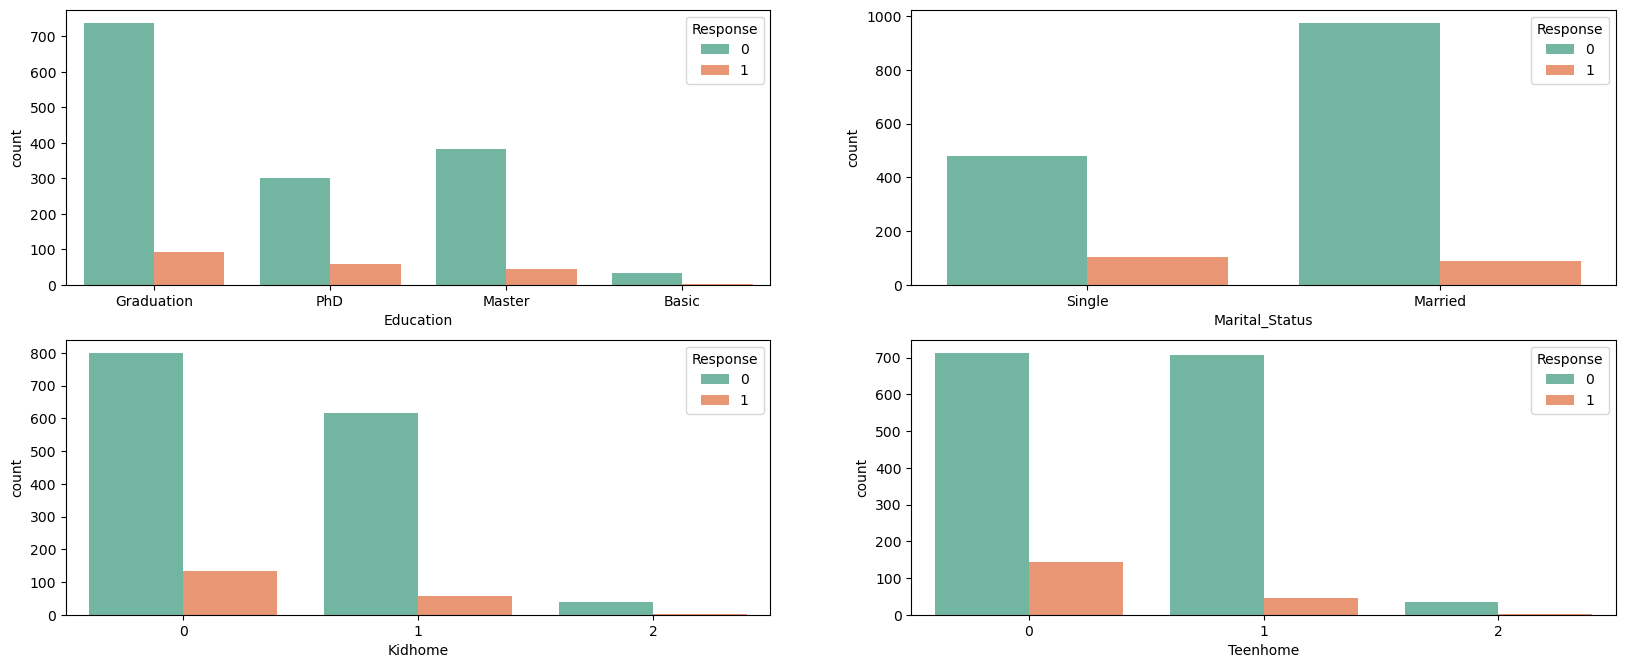

In [18]:
plt.figure(figsize = (20,25))

plt.subplot(6,2,1)
sns.countplot(x = 'Education', palette = 'Set2', data = df, hue='Response')

plt.subplot(6,2,2)
sns.countplot(x = 'Marital_Status', palette = 'Set2', data = df, hue='Response')

plt.subplot(6,2,3)

sns.countplot(x = 'Kidhome', palette = 'Set2', data = df, hue='Response')

plt.subplot(6,2,4)

sns.countplot(x = 'Teenhome', palette = 'Set2', data = df, hue='Response')


# Save the plot as a PNG image with transparent background
plt.savefig("correlations categorical simple vs resopnse.png", dpi=300, transparent=True)
plt.show()



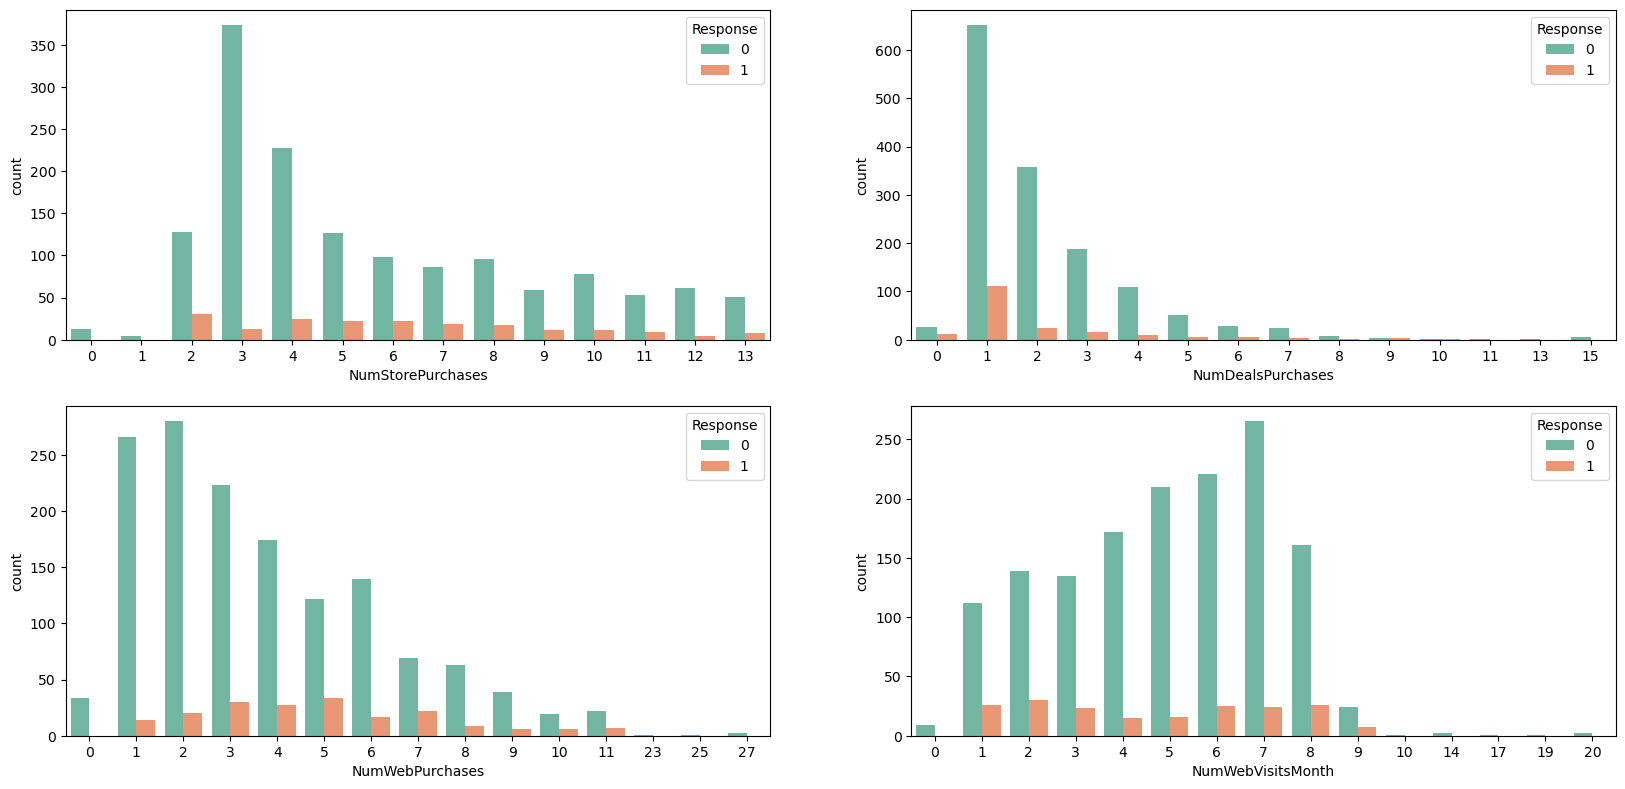

In [19]:
plt.figure(figsize = (20,30))

plt.subplot(6,2,5)
sns.countplot(x = 'NumStorePurchases', palette = 'Set2', data = df, hue='Response')

plt.subplot(6,2,6)
sns.countplot(x = 'NumDealsPurchases', palette = 'Set2', data = df, hue='Response')

plt.subplot(6,2,7)

sns.countplot(x = 'NumWebPurchases', palette = 'Set2', data = df, hue='Response')


plt.subplot(6,2,8)

sns.countplot(x = 'NumWebVisitsMonth', palette = 'Set2', data = df, hue='Response')

# Save the plot as a PNG image with transparent background
plt.savefig("correlations categorical visits vs resopnse.png", dpi=300, transparent=True)
plt.show()

#### Continuous Variables

#### Looking at our continuous variables we can see that most of our customers are adults, followed by seniors, when we look at the variable Income we can see that we have a concentration of prices between 0 and 10000 with some data above that value, we can see that the variable Recency is well balanced, when we look at the amount spent on certain products, the higher the spend, the lower the amount of data.

<AxesSubplot:xlabel='Total_Amount_Spent', ylabel='Count'>

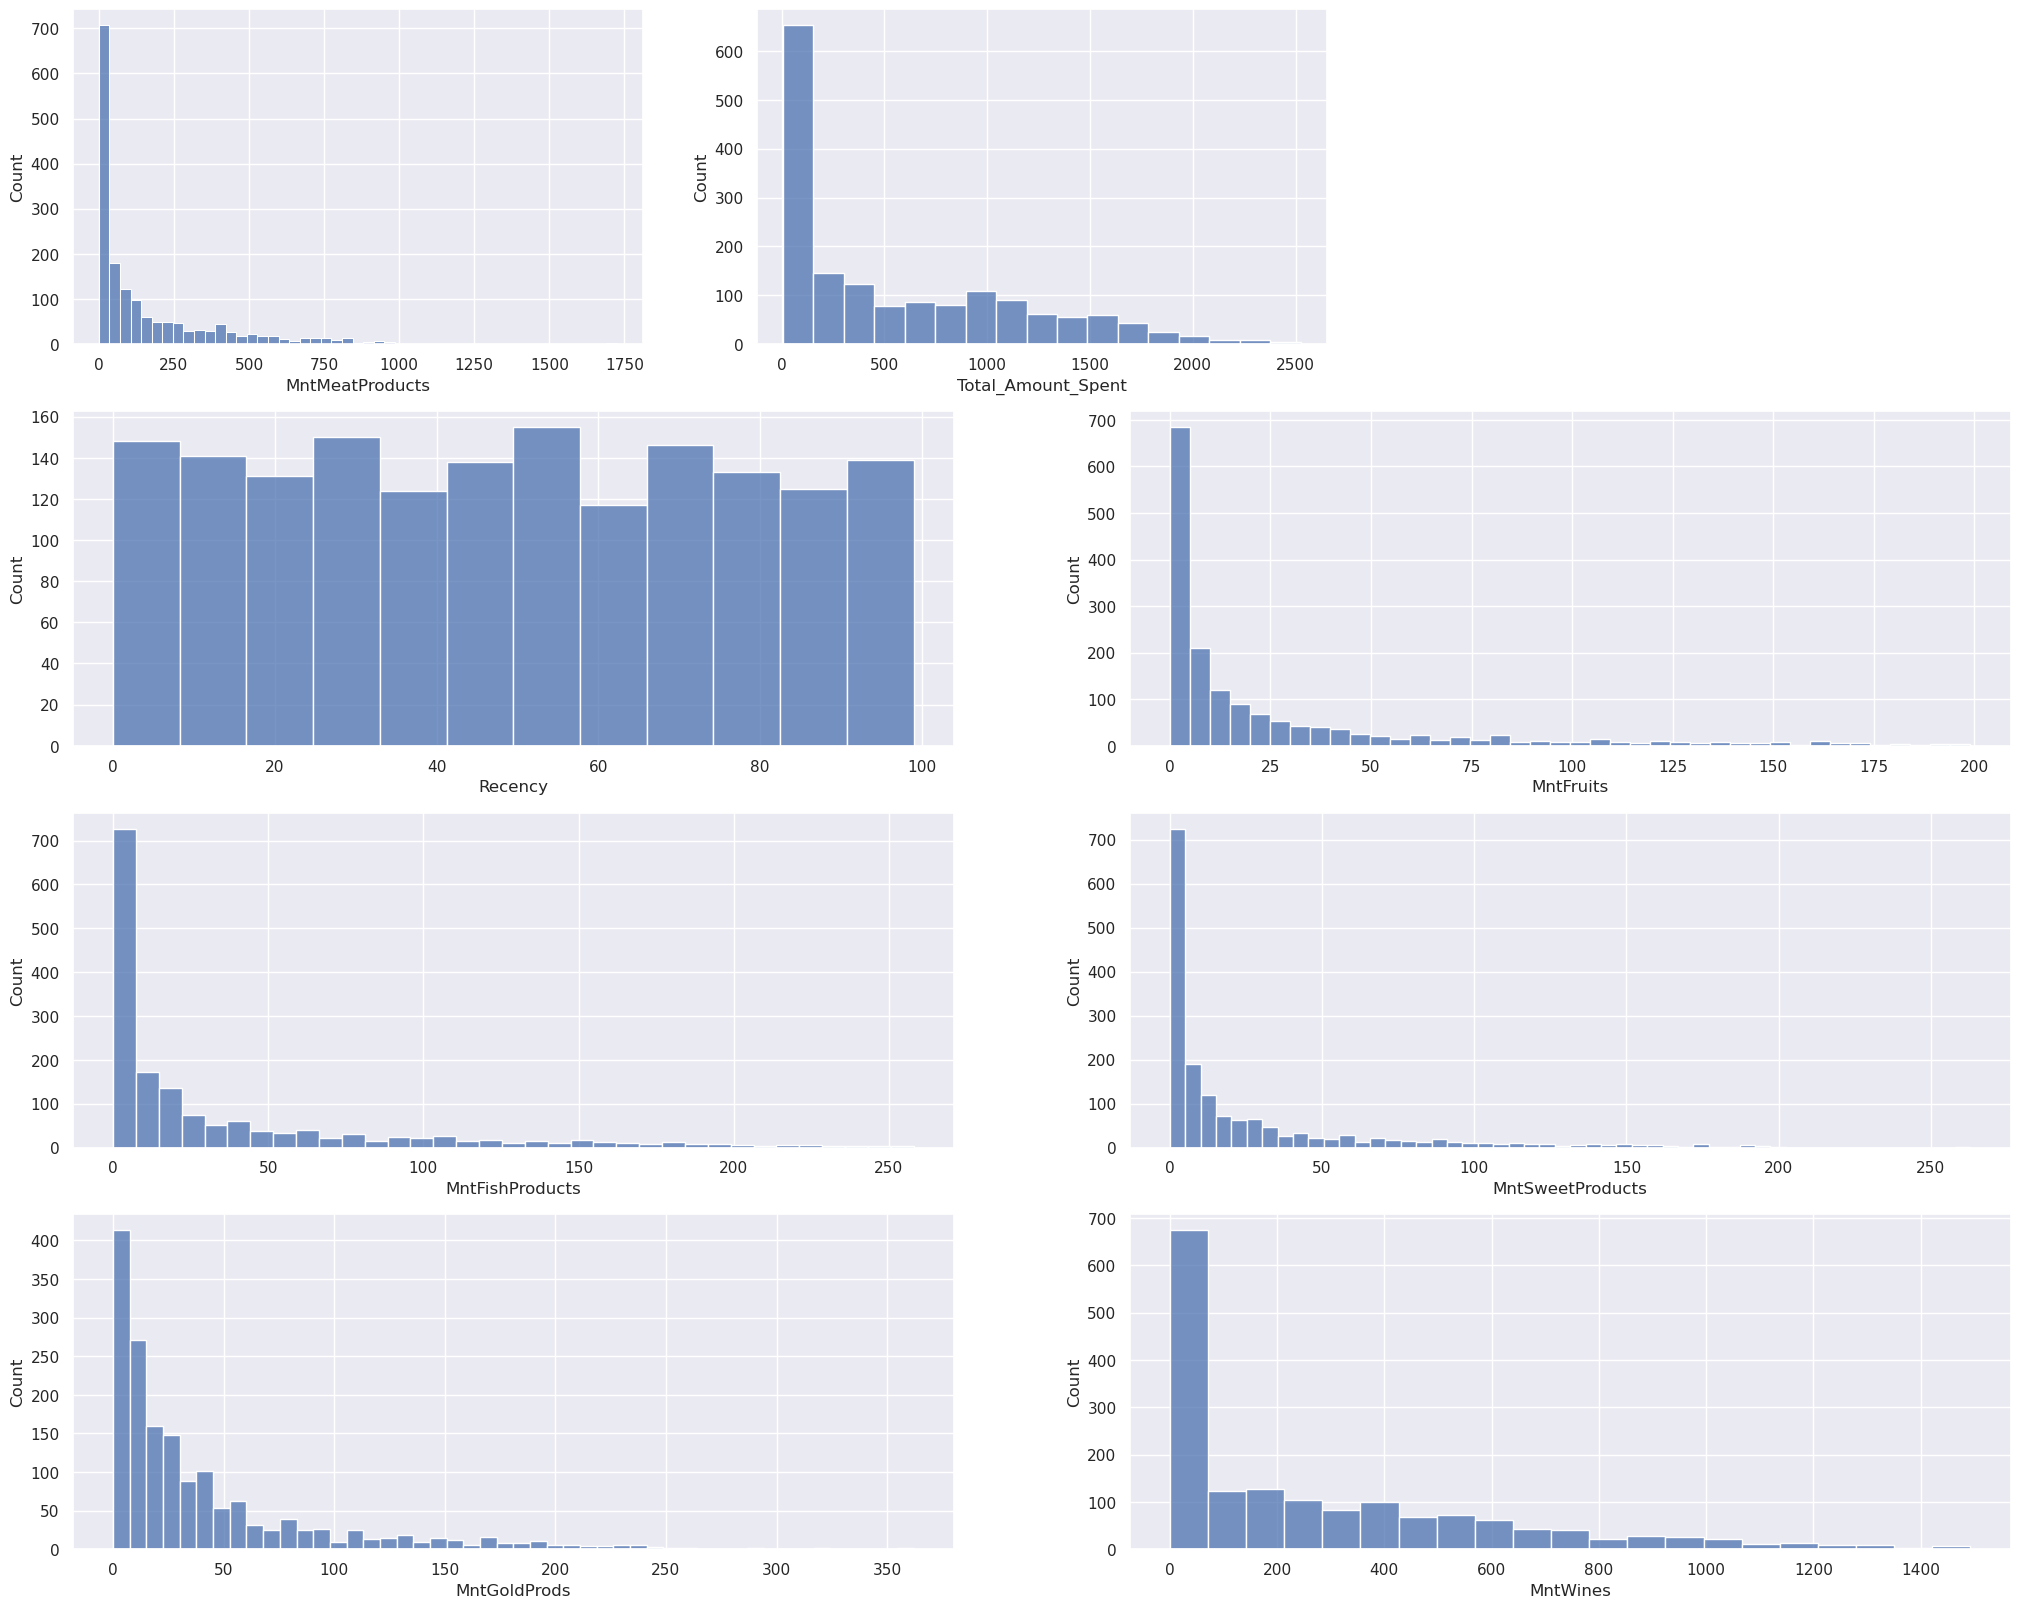

In [20]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(4,2,1)
sns.histplot(df['Year_Birth'], kde = False)

plt.subplot(4,2,2)
sns.histplot(df['Income'], kde = False)

plt.subplot(4,2,3)
sns.histplot(df['Recency'], kde = False)

plt.subplot(4,2,4)
sns.histplot(df['MntFruits'], kde = False)

plt.subplot(4,2,5)
sns.histplot(df['MntFishProducts'], kde = False)

plt.subplot(4,2,6)
sns.histplot(df['MntSweetProducts'], kde = False)

plt.subplot(4,2,7)
sns.histplot(df['MntGoldProds'], kde = False)

plt.subplot(4,2,8)
sns.histplot(df['MntWines'], kde = False)

plt.subplot(4,3,1)
sns.histplot(df['MntMeatProducts'], kde = False)

plt.subplot(4,3,2)
sns.histplot(df['Total_Amount_Spent'], kde = False)

#### In the boxplot of the age variable we can see that we have some data that were born before 1900, this data is very strange, so I thought it best to remove them.

<AxesSubplot:title={'center':'Boxplot Year_Birth'}, xlabel='Year_Birth'>

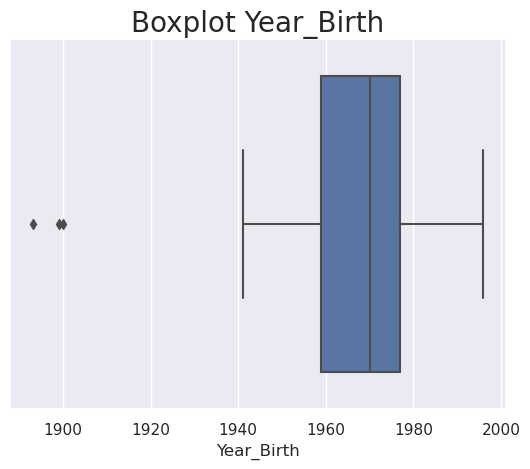

In [21]:
plt.title("Boxplot Year_Birth", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Year_Birth"])

In [22]:
df[df['Year_Birth'] < 1920]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Reg_year,Reg_month,Reg_week,Total_Amount_Spent
192,1900,Master,Single,36640.0,1,0,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,0,2013,9,3,65
239,1893,Master,Single,60182.0,0,1,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,2014,5,2,22
339,1899,PhD,Married,83532.0,0,0,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,2013,9,3,1853


In [23]:
df = df[df['Year_Birth'] > 1920]

<AxesSubplot:title={'center':'Boxplot Year_Birth'}, xlabel='Year_Birth'>

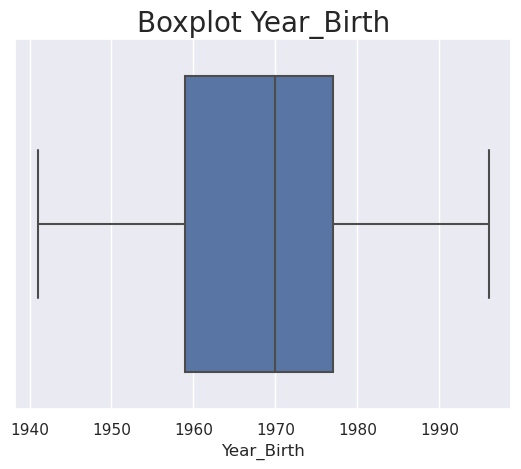

In [24]:
plt.title("Boxplot Year_Birth", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Year_Birth"])

#### Looking at our Income variable, we see this giant outlier, so let's remove it so as not to influence the model.

<AxesSubplot:title={'center':'Boxplot Income'}, xlabel='Income'>

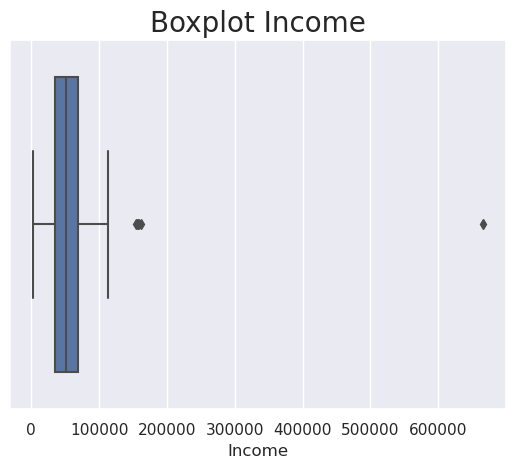

In [25]:
plt.title("Boxplot Income", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Income"])

In [26]:
df = df[df['Income'] < 250000]
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Reg_year,Reg_month,Reg_week,Total_Amount_Spent
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,2014,3,1,27
2,1965,Graduation,Married,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,2013,8,3,776
3,1984,Graduation,Married,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,2014,2,1,53
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,2014,1,2,422
5,1967,Master,Married,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,2013,9,1,716


<AxesSubplot:title={'center':'Boxplot Income'}, xlabel='Income'>

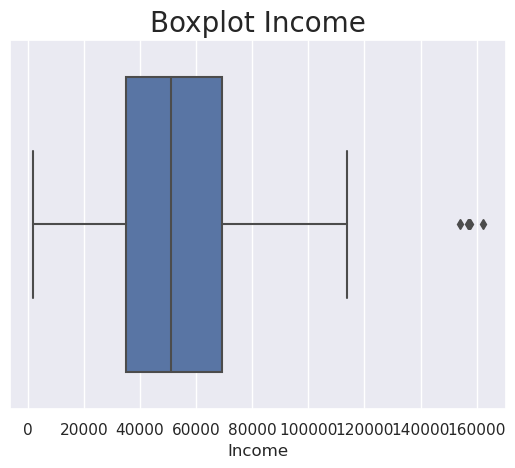

In [27]:
plt.title("Boxplot Income", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Income"])

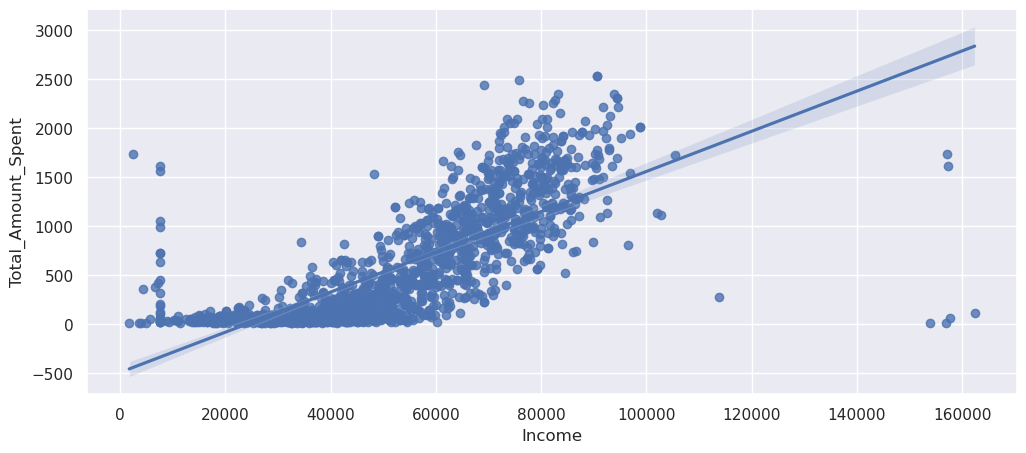

In [28]:
plt.figure(figsize=(12, 5))
sns.regplot(y=df.Total_Amount_Spent, x=df.Income)
# Save the plot as a PNG image with transparent background
plt.savefig("correlation ncome Total_Amount_Spent INSIGHT .png", dpi=300, transparent=True)
plt.show()

<AxesSubplot:title={'center':'Boxplot Recency'}, xlabel='Recency'>

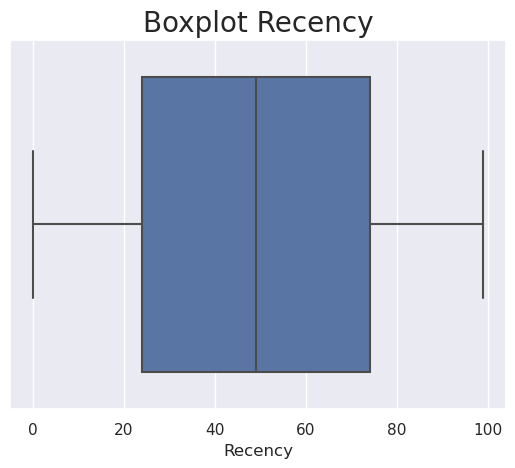

In [29]:
plt.title("Boxplot Recency", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Recency"])

In [30]:
df = df[df['MntFruits'] < 75]

<AxesSubplot:title={'center':'Boxplot MntFruits'}, xlabel='MntFruits'>

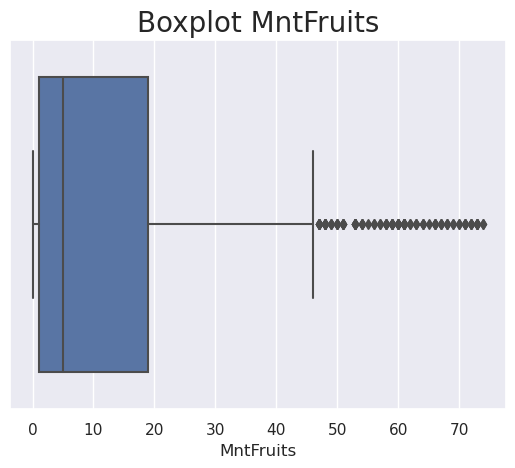

In [31]:
plt.title("Boxplot MntFruits", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntFruits"])

In [32]:
df = df[df['MntFishProducts'] < 55]

<AxesSubplot:title={'center':'Boxplot MntFishProducts'}, xlabel='MntFishProducts'>

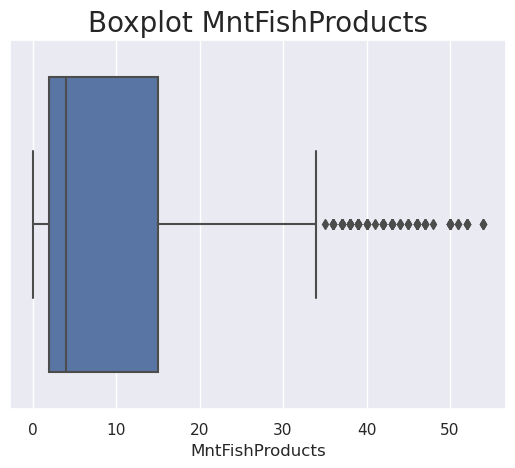

In [33]:
plt.title("Boxplot MntFishProducts", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntFishProducts"])

In [34]:
df = df[df['MntSweetProducts'] < 55]

<AxesSubplot:title={'center':'Boxplot MntSweetProducts'}, xlabel='MntSweetProducts'>

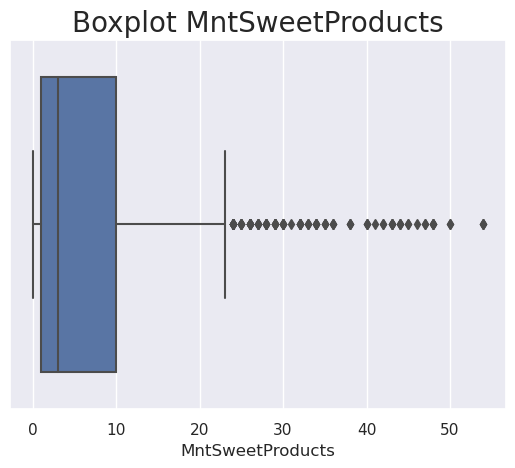

In [35]:

plt.title("Boxplot MntSweetProducts", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntSweetProducts"])

In [36]:
df = df[df['MntGoldProds'] < 70]

<AxesSubplot:title={'center':'Boxplot MntGoldProds'}, xlabel='MntGoldProds'>

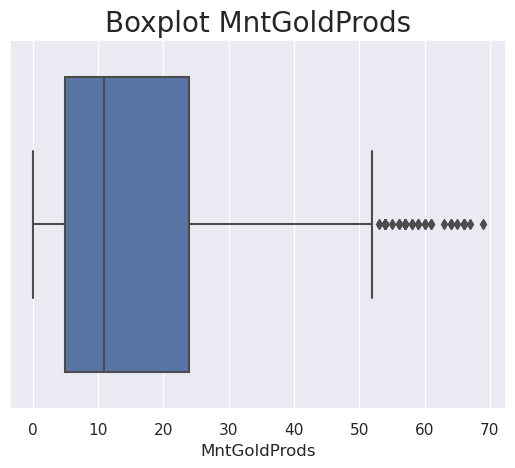

In [37]:
plt.title("Boxplot MntGoldProds", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntGoldProds"])

#### Bivariate Analysis

#### Now, comparing the Target variable with our continuous variables, we managed to find a pattern, practically in all variables, the greater the expense, the more inclined the person is to give a positive answer, the only variable that does the opposite of that is Recency and it is which is more unbalanced, we can see that we have a good difference when compared to the target variable, the smaller the value of the variable Recency, the more likely to have a positive response.

<AxesSubplot:xlabel='Response', ylabel='MntGoldProds'>

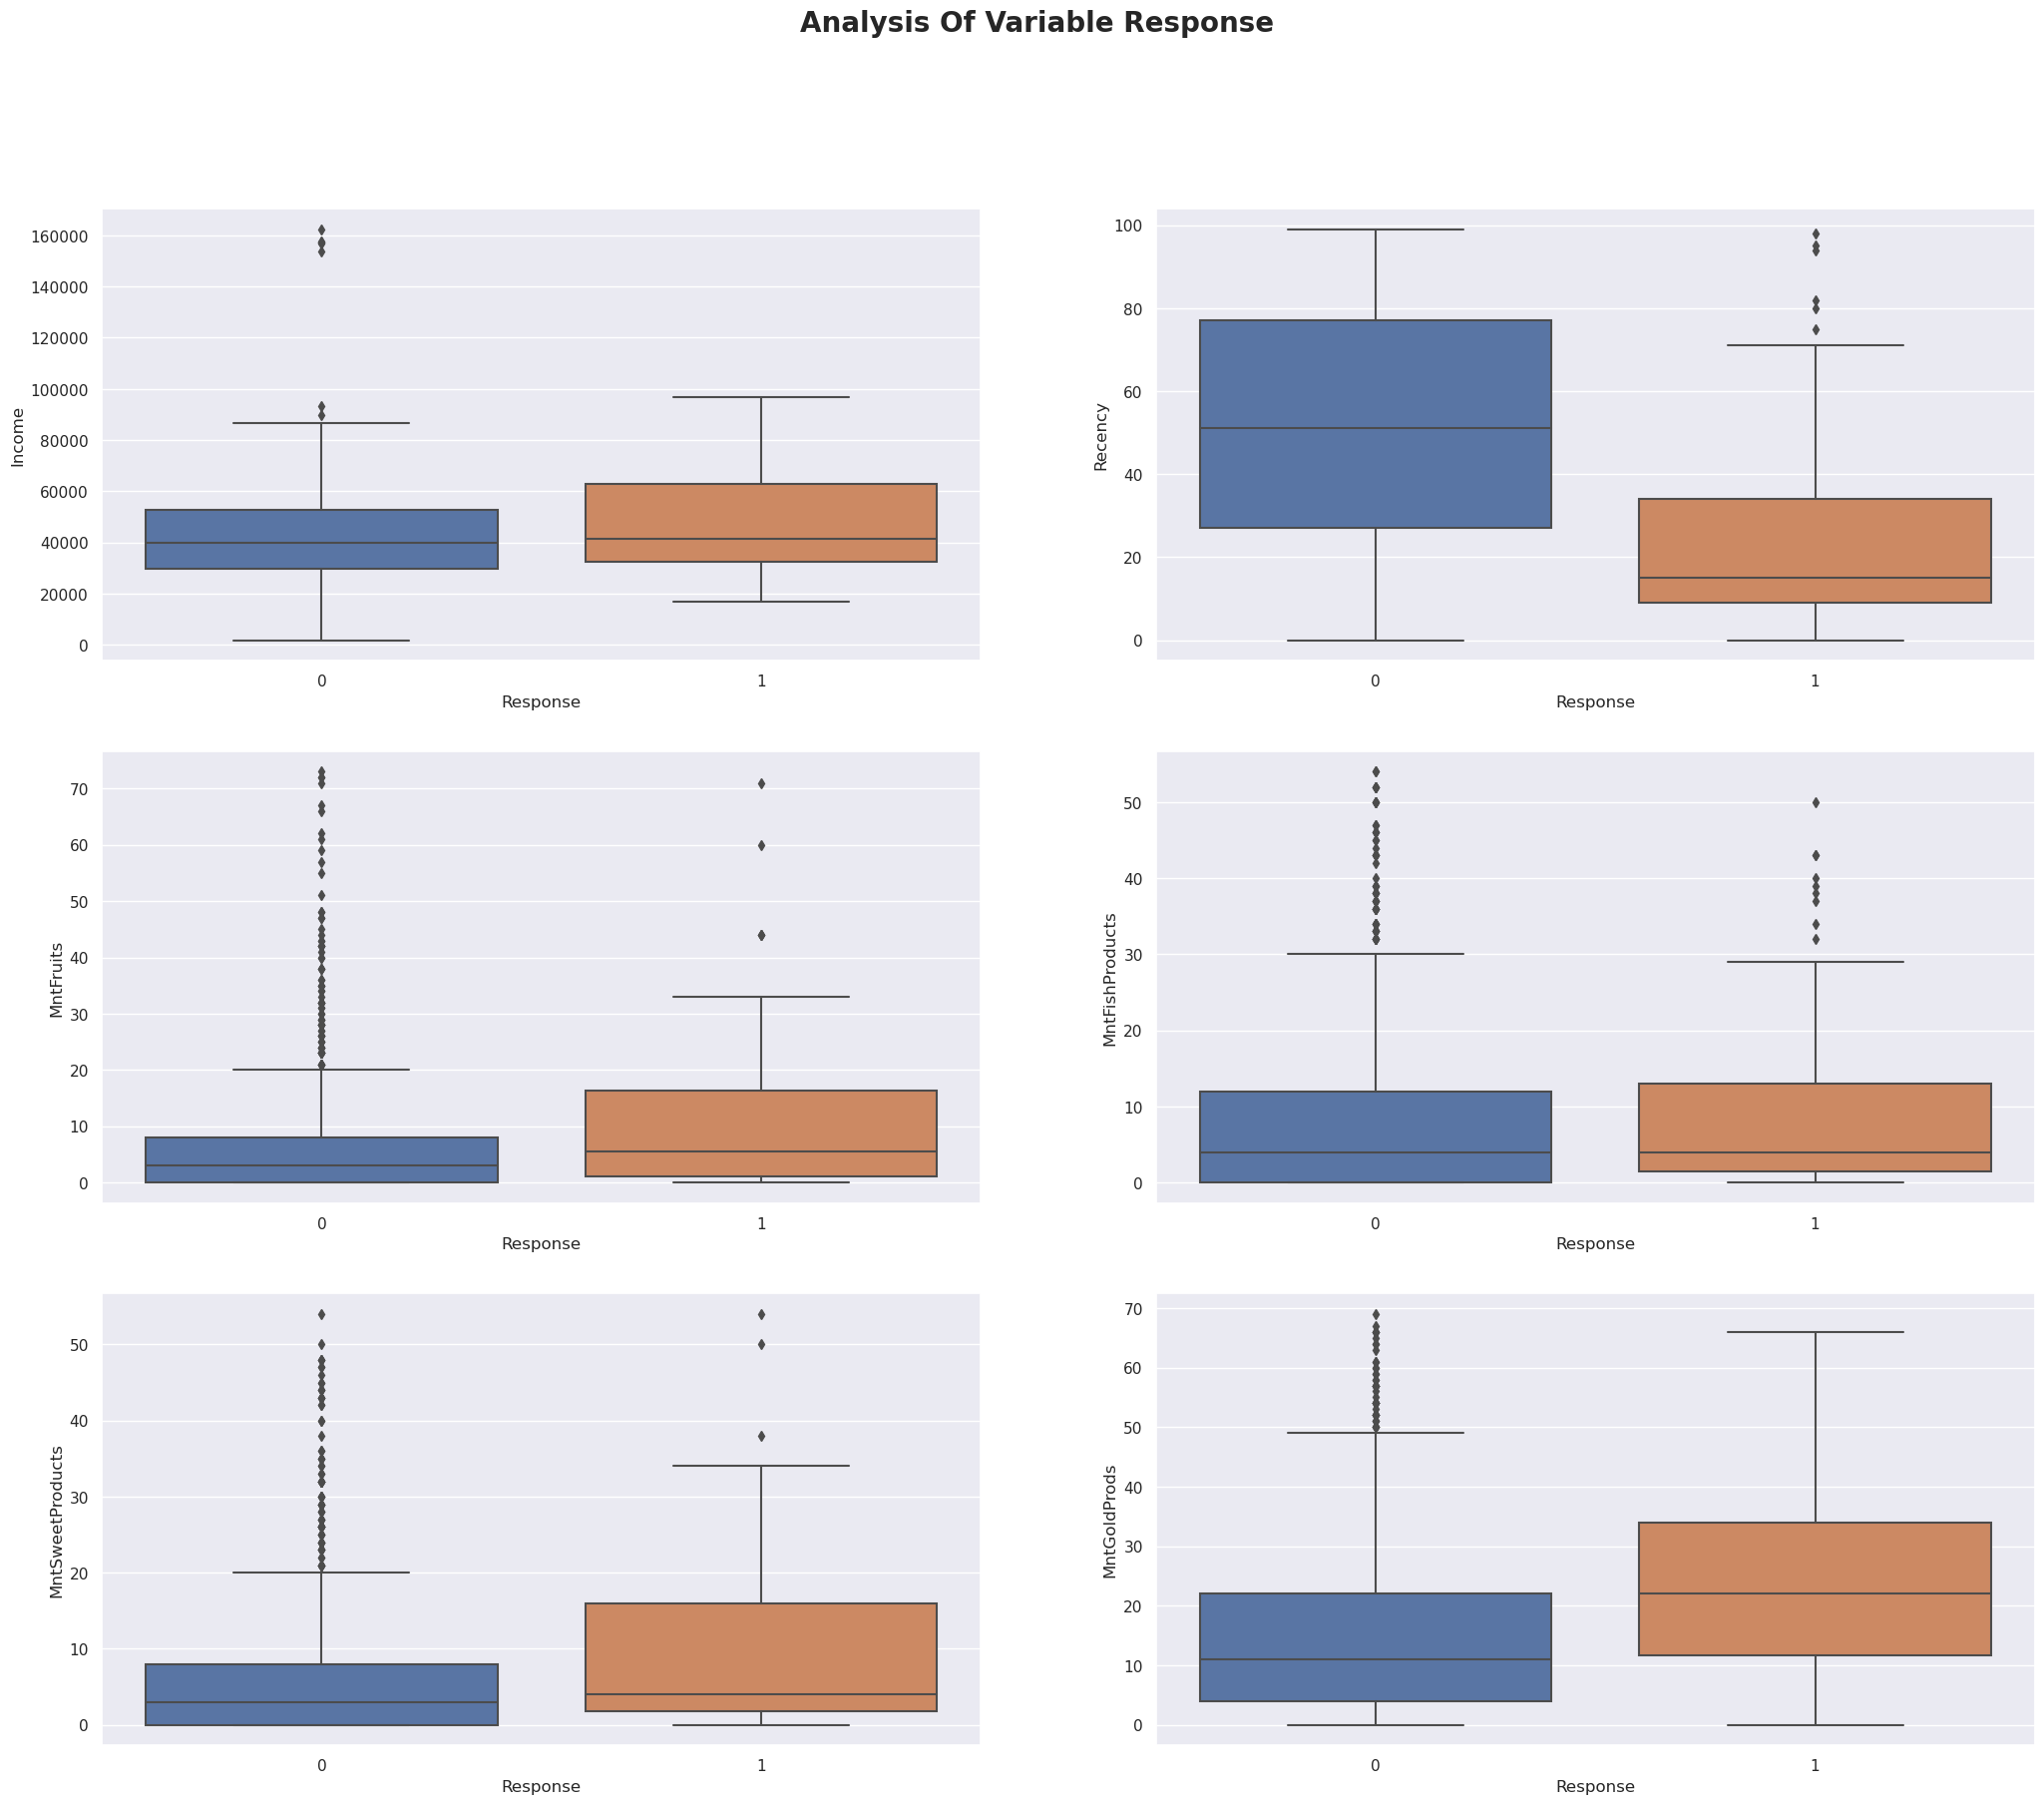

In [38]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Response",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="Response", y="Income", data=df)

plt.subplot(3,2,2)
sns.boxplot(x="Response", y="Recency", data=df)

plt.subplot(3,2,3)
sns.boxplot(x="Response", y="MntFruits", data=df)

plt.subplot(3,2,4)
sns.boxplot(x="Response", y="MntFishProducts", data=df)

plt.subplot(3,2,5)
sns.boxplot(x="Response", y="MntSweetProducts", data=df)

plt.subplot(3,2,6)
sns.boxplot(x="Response", y="MntGoldProds", data=df)

In [39]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Reg_year', 'Reg_month', 'Reg_week', 'Total_Amount_Spent'],
      dtype='object')

In [40]:
df = df.drop(['Reg_year', 'Reg_month', 'Reg_week','MntFishProducts','MntSweetProducts'], axis = 1)


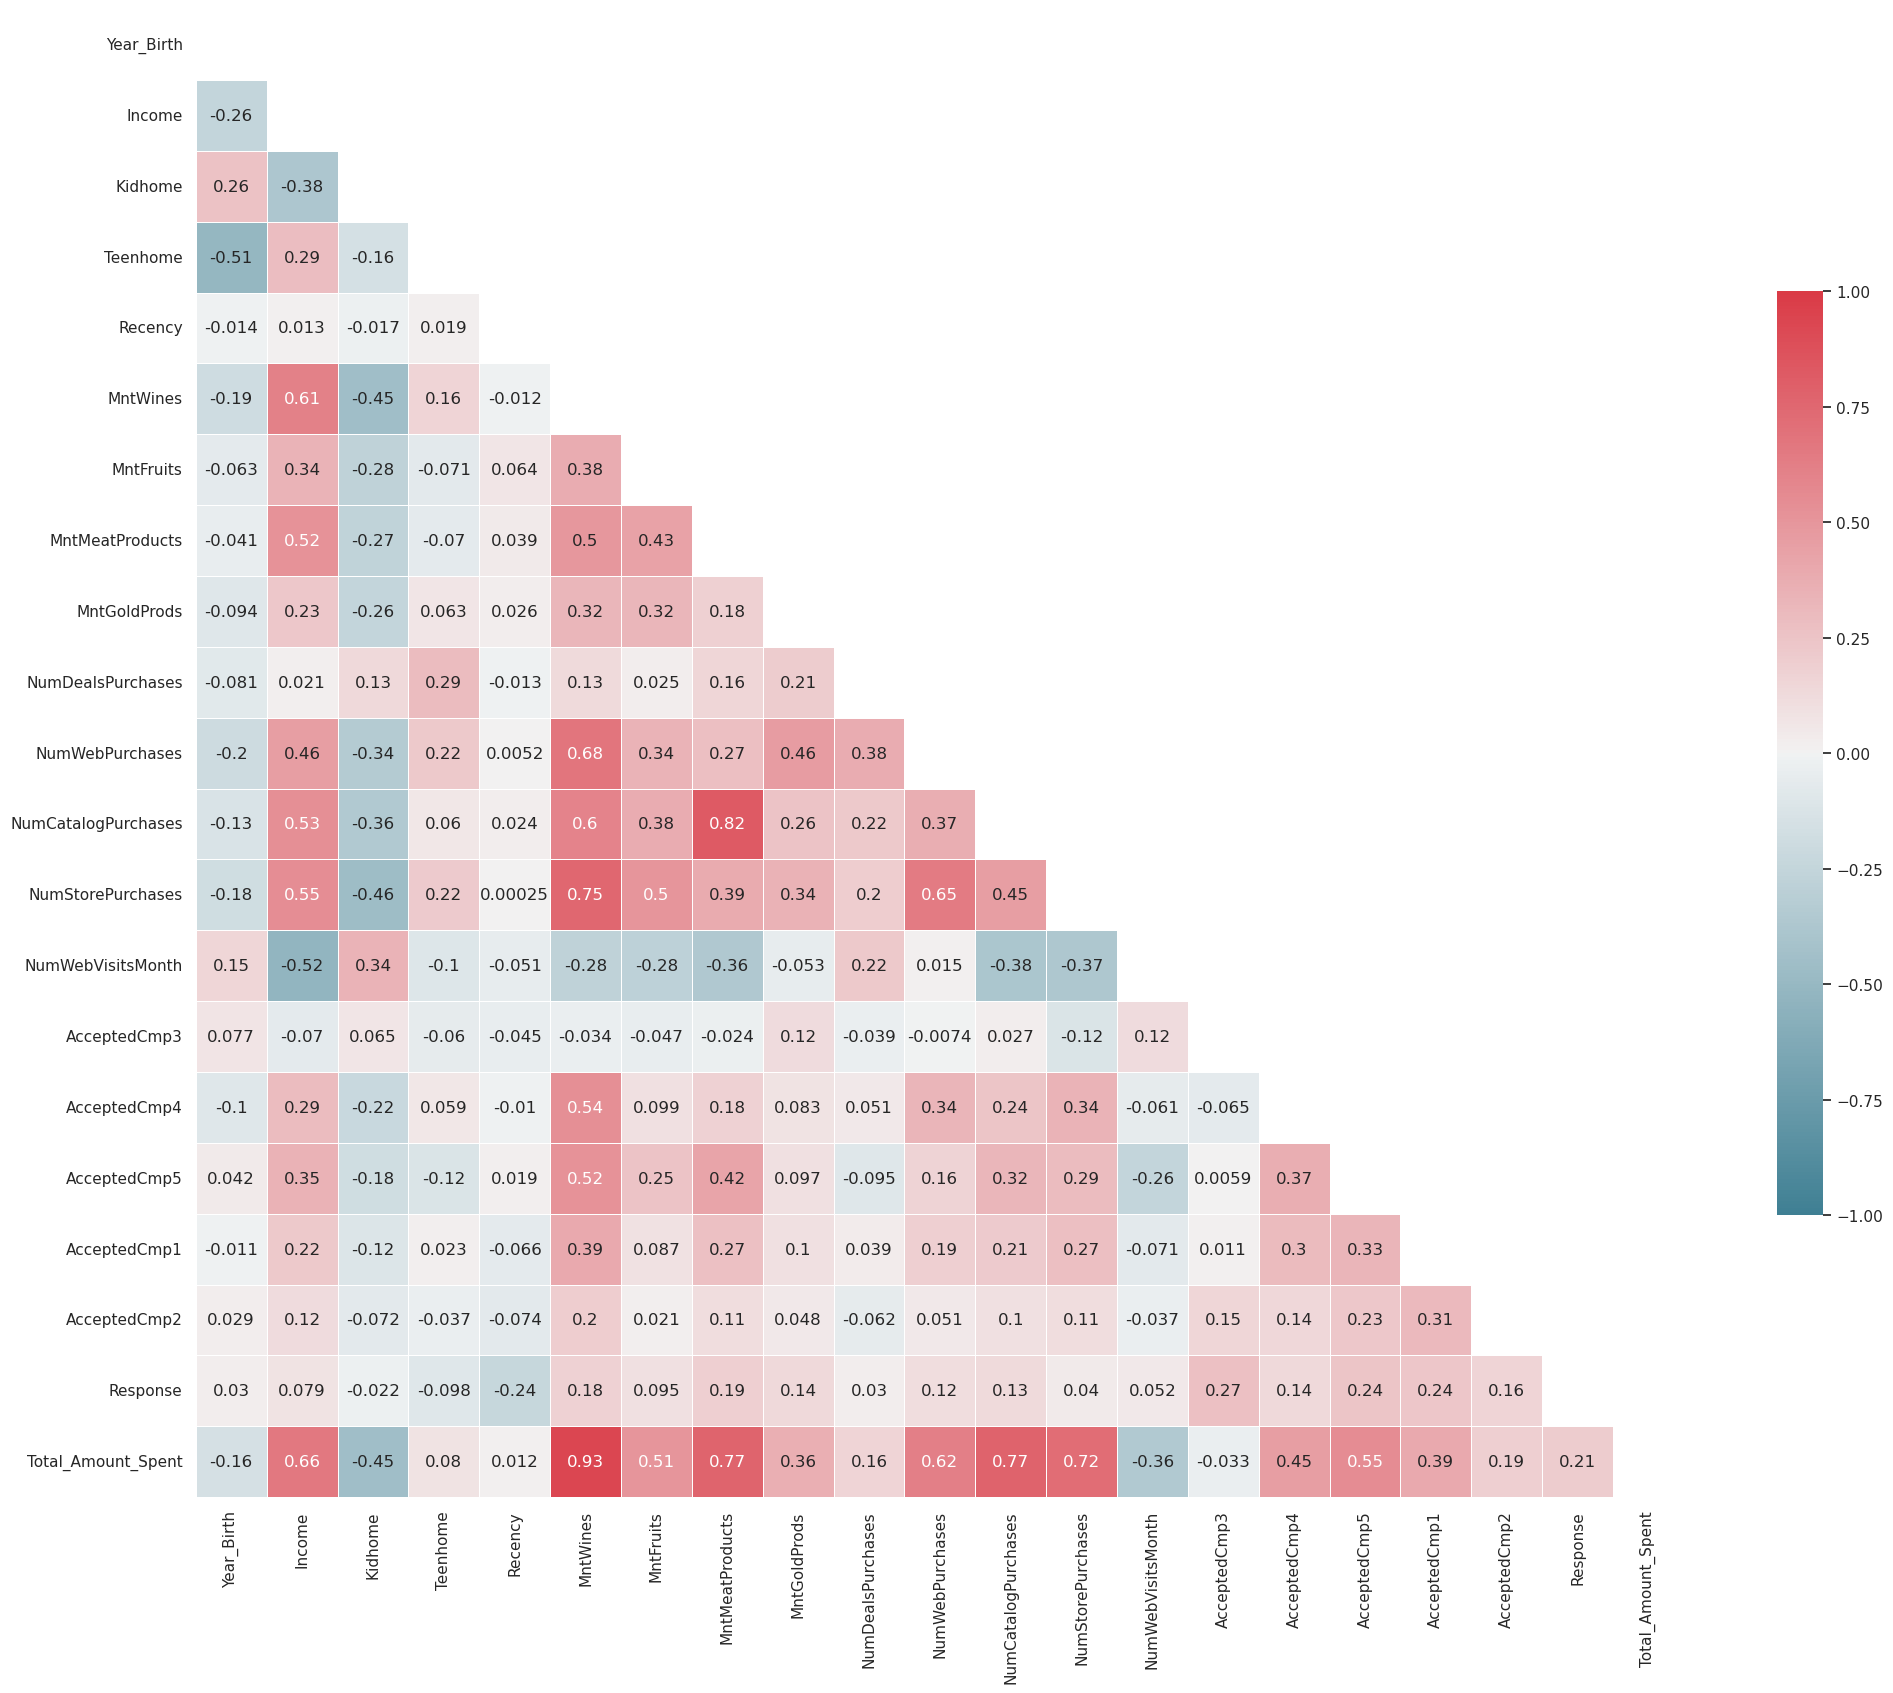

In [41]:
sns.set(style="white")

#Mask
mask = np.zeros_like(df.corr(),dtype=bool)
mask[np.triu_indices_from(mask)]= True
#figure
f, ax = plt.subplots(figsize= (24,24))
#colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#heatmap+mask+ correct ratio
sns.heatmap(df.corr(), mask= mask, cmap= cmap, vmax=1, center=0, vmin= -1,
            square=True, linewidths = .5, cbar_kws={'shrink': .5, }, annot= True)
# Save the plot as a PNG image with transparent background
plt.savefig("correlations.png", dpi=300, transparent=True)
plt.show()

AcceptedCmp3,Recency,MntMeatProducts,MntGoldProds

In [42]:
df.corr()


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Amount_Spent
Year_Birth,1.000000,-0.255983,0.263037,-0.513530,-0.013836,-0.191441,-0.063095,-0.040747,-0.093872,-0.080907,-0.196584,-0.131667,-0.184820,0.154630,0.076553,-0.100086,0.042276,-0.010649,0.029337,0.029719,-0.156066
Income,-0.255983,1.000000,-0.377212,0.286850,0.013445,0.614034,0.343585,0.519685,0.231296,0.020742,0.455178,0.531996,0.546834,-0.524760,-0.069756,0.289607,0.345806,0.221296,0.118987,0.079399,0.662919
Kidhome,0.263037,-0.377212,1.000000,-0.158032,-0.017410,-0.447256,-0.278216,-0.271749,-0.255467,0.134002,-0.340018,-0.355774,-0.461255,0.342865,0.064876,-0.219537,-0.182067,-0.115372,-0.072321,-0.022194,-0.447771
Teenhome,-0.513530,0.286850,-0.158032,1.000000,0.019079,0.159809,-0.070961,-0.069756,0.063154,0.293917,0.223519,0.059709,0.217050,-0.103150,-0.060453,0.058732,-0.119695,0.022515,-0.036897,-0.097955,0.080117
Recency,-0.013836,0.013445,-0.017410,0.019079,1.000000,-0.012064,0.064160,0.039117,0.025685,-0.013495,0.005197,0.024355,0.000247,-0.050643,-0.044699,-0.010489,0.019222,-0.065598,-0.073524,-0.238818,0.012467
MntWines,-0.191441,0.614034,-0.447256,0.159809,-0.012064,1.000000,0.382504,0.496711,0.323503,0.130234,0.676746,0.599452,0.750127,-0.277713,-0.033827,0.538703,0.520705,0.393048,0.201327,0.179175,0.930818
MntFruits,-0.063095,0.343585,-0.278216,-0.070961,0.064160,0.382504,1.000000,0.432216,0.322992,0.024985,0.341352,0.378975,0.503466,-0.282279,-0.046644,0.099108,0.254623,0.086679,0.020614,0.095223,0.505062
MntMeatProducts,-0.040747,0.519685,-0.271749,-0.069756,0.039117,0.496711,0.432216,1.000000,0.182217,0.155135,0.274632,0.823263,0.387024,-0.361969,-0.024380,0.176046,0.423331,0.272000,0.114290,0.188724,0.771844
MntGoldProds,-0.093872,0.231296,-0.255467,0.063154,0.025685,0.323503,0.322992,0.182217,1.000000,0.210420,0.464125,0.255957,0.344467,-0.053172,0.123519,0.082528,0.097268,0.099872,0.048316,0.138310,0.362249
NumDealsPurchases,-0.080907,0.020742,0.134002,0.293917,-0.013495,0.130234,0.024985,0.155135,0.210420,1.000000,0.375067,0.222633,0.197709,0.219290,-0.039011,0.051263,-0.094746,0.039045,-0.061561,0.030136,0.162219


## <font color='blue'> 3. Model Building. </font>

#### Label Encoder
- Here we are going to use the LabelEncoder to transform our categorical variables into numeric variables.


In [43]:
le = LabelEncoder()

df['Kidhome_encoded'] = df['Kidhome'].apply(lambda x: le.fit_transform([x])[0])


In [44]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Amount_Spent,Kidhome_encoded
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,6,2,1,1,2,5,0,0,0,0,0,0,27,0
3,1984,Graduation,Married,26646.0,1,0,26,11,4,20,5,2,2,0,4,6,0,0,0,0,0,0,53,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,15,5,5,3,6,5,0,0,0,0,0,0,422,0
5,1967,Master,Married,62513.0,0,1,16,520,42,98,14,2,6,4,10,6,0,0,0,0,0,0,716,0
7,1985,PhD,Married,33454.0,1,0,32,76,10,56,23,2,4,0,4,8,0,0,0,0,0,0,169,0


In [45]:

label_encoder_Education = LabelEncoder()
label_encoder_Marital_Status = LabelEncoder()

df['Education'] = label_encoder_Education.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder_Marital_Status.fit_transform(df['Marital_Status'])

#### Separating into features variables and target variable.

In [46]:
X = df.drop('Response', axis = 1)
X = X.values
y = df['Response']

#### Balancing Classes
- As we have many values ​​of a class and few values ​​of others, we will balance the classes using OverSampling to make the classes balanced.

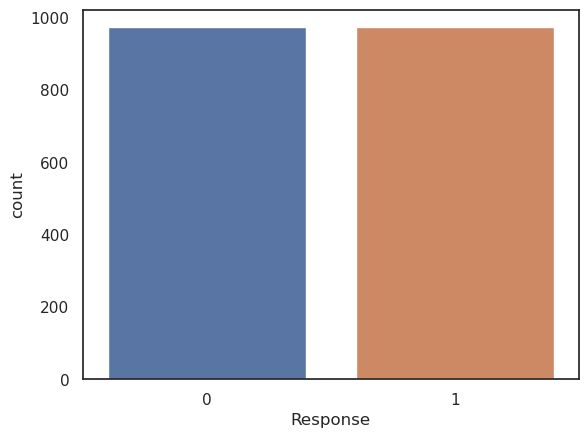

In [47]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

In [48]:
X.shape, y.shape

((1948, 23), (1948,))

#### StandardScaler
- Here we will use StandardScaler to put our data in the same scale.

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [50]:
def find_feature_correlations(df):
    
    """
    Find correlations between df features and convert to a format 
    with one feature1 vs. feature2 correlation value per row 
    
    _Params:_
    
    df: pandas DataFrame, features as columns. All datatypes must be numeric
    
    Returns a pandas DataFrame where a row contains one feature1 vs. feature2 correlation value
    """
    
    # initalise variable lists 
    var1 = []
    var2 = []
    pearsons = []
    pvalues = []
    
    # iterate over generator for tuples of feature combination pairs
    for comb in combinations(df.columns.tolist(), 2):
        
        v1 = comb[0] 
        var1.append(v1) # save feature 1 to list 

        v2 = comb[1]
        var2.append(v2) # save feature 2 to list
        
        p, p_value = stats.pearsonr(df[v1], df[v2]) # get pearson correlation
        pearsons.append(p)
        pvalues.append(p_value)
    
    # Build dataframe of feature1 vs. feature2 pearson correlation
    corr_df = pd.DataFrame({'Feature1': var1,
                            'Feature2': var2,
                            'P': pearsons,
                            'p-value': pvalues})
    
    return corr_df

In [51]:
# Use custom function to calculate correlations
df_corr = find_feature_correlations(df.select_dtypes(np.number))

# Sort rows by descending values of P 
df_corr[df_corr['P'] > 0.5]

/home/gaio/anaconda3/envs/testenviroment/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,Feature1,Feature2,P,p-value
69,Income,MntWines,0.614034,1.194384e-110
71,Income,MntMeatProducts,0.519685,3.054243e-74
75,Income,NumCatalogPurchases,0.531996,2.349504e-78
76,Income,NumStorePurchases,0.546834,1.517775e-83
84,Income,Total_Amount_Spent,0.662919,6.785150e-135
144,MntWines,NumWebPurchases,0.676746,1.308777e-142
145,MntWines,NumCatalogPurchases,0.599452,3.236078e-104
146,MntWines,NumStorePurchases,0.750127,7.099288e-192
149,MntWines,AcceptedCmp4,0.538703,1.141026e-80
150,MntWines,AcceptedCmp5,0.520705,1.414177e-74


In [52]:
df.columns


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Total_Amount_Spent', 'Kidhome_encoded'],
      dtype='object')











# Model Comparation

Logistic regression

Logistic Regression Model heatmap and report:------------------------------------------------------
Accuracy on train dataset: 0.8815068493150685
Accuracy on test dataset: 0.8490566037735849
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       244
           1       0.30      0.67      0.41        21

    accuracy                           0.85       265
   macro avg       0.63      0.77      0.66       265
weighted avg       0.91      0.85      0.87       265



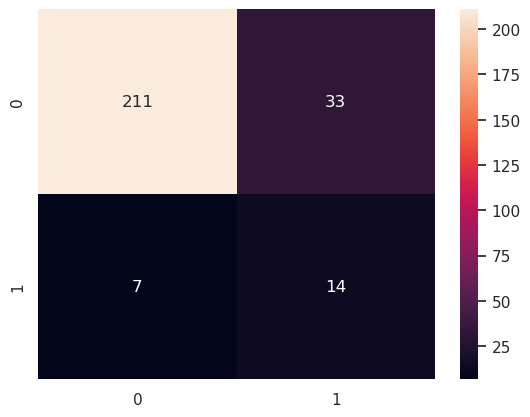

In [53]:
#Target
target_col = 'Response'
feature_cols = [c for c in df.columns if c != target_col]

X= df[feature_cols]
y= df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1,stratify=y)

# Oversample the training data using RandomOverSampler
ros = RandomOverSampler(random_state=5)
X_train, y_train = ros.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_standard = scaler.fit_transform(X_train)
X_standard_test = scaler.transform(X_test)

lin_model = LogisticRegression(solver= 'liblinear',penalty='l2', C=100, max_iter=1200)
lin_model.fit(X_train, y_train)

# Calculate accuracy for train dataset
train_pred = lin_model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)

# Calculate accuracy for test dataset
test_pred = lin_model.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)

print('Logistic Regression Model heatmap and report:------------------------------------------------------')

print('Accuracy on train dataset:', train_acc)
print('Accuracy on test dataset:', test_acc)

cm = confusion_matrix(y_test, test_pred)
sns.heatmap(cm,annot=True, fmt= 'd')
print(classification_report(y_test, test_pred))


In [54]:
#### 6.1 Find Best Estimator For Logistic Regression 

lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100],
        'max_iter': [1200]
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv= 5, verbose= 3)
lr_gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ......C=1, max_iter=1200, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ......C=1, max_iter=1200, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ......C=1, max_iter=1200, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ......C=1, max_iter=1200, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ......C=1, max_iter=1200, penalty=l1;, score=nan total time=   0.0s


/home/gaio/anaconda3/envs/testenviroment/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ....C=1, max_iter=1200, penalty=l2;, score=0.920 total time=   0.8s
[CV 2/5] END ....C=1, max_iter=1200, penalty=l2;, score=0.934 total time=   0.2s
[CV 3/5] END ....C=1, max_iter=1200, penalty=l2;, score=0.910 total time=   0.2s
[CV 4/5] END ....C=1, max_iter=1200, penalty=l2;, score=0.915 total time=   0.4s
[CV 5/5] END ....C=1, max_iter=1200, penalty=l2;, score=0.919 total time=   0.3s
[CV 1/5] END .....C=10, max_iter=1200, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....C=10, max_iter=1200, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .....C=10, max_iter=1200, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .....C=10, max_iter=1200, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .....C=10, max_iter=1200, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...C=10, max_iter=1200, penalty=l2;, score=0.920 total time=   0.5s
[CV 2/5] END ...C=10, max_iter=1200, penalty=l2;, score=0.934 total time=   0.3s
[CV 3/5] END ...C=10, max_it

/home/gaio/anaconda3/envs/testenviroment/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...C=10, max_iter=1200, penalty=l2;, score=0.919 total time=   0.4s
[CV 5/5] END ...C=10, max_iter=1200, penalty=l2;, score=0.919 total time=   0.2s
[CV 1/5] END ....C=100, max_iter=1200, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ....C=100, max_iter=1200, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ....C=100, max_iter=1200, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ....C=100, max_iter=1200, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ....C=100, max_iter=1200, penalty=l1;, score=nan total time=   0.0s


/home/gaio/anaconda3/envs/testenviroment/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ..C=100, max_iter=1200, penalty=l2;, score=0.920 total time=   0.3s
[CV 2/5] END ..C=100, max_iter=1200, penalty=l2;, score=0.934 total time=   0.3s
[CV 3/5] END ..C=100, max_iter=1200, penalty=l2;, score=0.910 total time=   0.2s
[CV 4/5] END ..C=100, max_iter=1200, penalty=l2;, score=0.910 total time=   0.2s
[CV 5/5] END ..C=100, max_iter=1200, penalty=l2;, score=0.919 total time=   0.2s


/home/gaio/anaconda3/envs/testenviroment/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/gaio/anaconda3/envs/testenviroment/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gaio/anaconda3/envs/testenviroment/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/gaio/anaconda3/envs/testenviroment/lib/python3.9

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100], 'max_iter': [1200],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [55]:
lr_gs.best_estimator_

LogisticRegression(C=10, max_iter=1200)

In [56]:
print(lr_gs.best_params_)
print(lr_gs.best_score_)

{'C': 10, 'max_iter': 1200, 'penalty': 'l2'}
0.9206027005275864


#### Naive Bayes
- Running Gaussian Model.
- Here we will use the Naive Bayes Model, we will test Gaussian model

Best hyperparameters: {'min_samples_leaf': 5, 'n_estimators': 100}
Best mean test score: 0.9959889285044099
Random Forest Model heatmap and report:------------------------------------------------------
Accuracy on train dataset: 0.986986301369863
Accuracy on test dataset: 0.9245283018867925
ROC AUC score: 0.8788056206088993
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       244
           1       0.53      0.48      0.50        21

    accuracy                           0.92       265
   macro avg       0.74      0.72      0.73       265
weighted avg       0.92      0.92      0.92       265



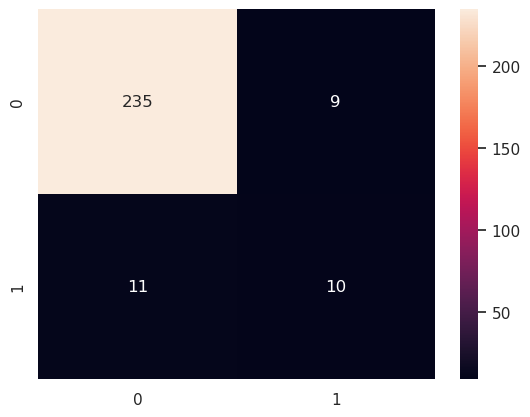

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns

#Target
target_col = 'Response'
feature_cols = [c for c in df.columns if c != target_col]

X= df[feature_cols]
y= df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Oversample the training data using RandomOverSampler
ros = RandomOverSampler(random_state=5)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'min_samples_leaf': [5, 10, 15, 20]
}

# Instantiate the random forest classifier
model = RandomForestClassifier(criterion='entropy')

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean test score
print('Best hyperparameters:', grid_search.best_params_)
print('Best mean test score:', grid_search.best_score_)

# Predict on the test data using the best estimator
best_model = grid_search.best_estimator_
test_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate accuracy for train dataset
train_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)

# Calculate accuracy for test dataset
test_acc = accuracy_score(y_test, test_pred)

print('Random Forest Model heatmap and report:------------------------------------------------------')

print('Accuracy on train dataset:', train_acc)
print('Accuracy on test dataset:', test_acc)
print('ROC AUC score:', roc_auc_score(y_test, y_prob))

cm = confusion_matrix(y_test, test_pred)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, test_pred))

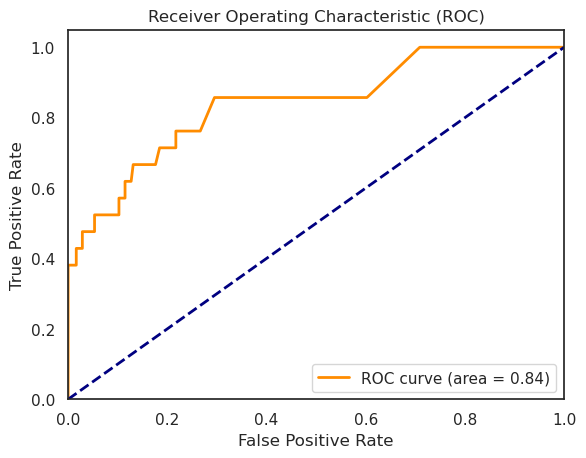

In [60]:
from sklearn.metrics import roc_curve, auc

# Predict class probabilities for test data
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



In [ ]:
# Define the grid of hyperparameters to search
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']}

# Create the GridSearchCV object
grid = GridSearchCV(SVC(probability=True), param_grid, cv=5)

# Fit the model on the training data
grid.fit(X_train, y_train)

# Get the best estimator from the grid search
best_svc_model = grid.best_estimator_

# Get the best hyperparameters from the grid search
best_params = grid.best_params_

# Calculate accuracy for train dataset
train_pred = best_svc_model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)

# Calculate accuracy for test dataset
test_pred = best_svc_model.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)

print('SVC Model heatmap and report:------------------------------------------------------')
print('Best hyperparameters:', best_params)
print('Accuracy on train dataset:', train_acc)
print('Accuracy on test dataset:', test_acc)

cm = confusion_matrix(y_test, test_pred)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, test_pred))



SVC Model heatmap and report:------------------------------------------------------
Accuracy on train dataset: 0.8931506849315068
Accuracy on test dataset: 0.8641509433962264
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       244
           1       0.33      0.71      0.45        21

    accuracy                           0.86       265
   macro avg       0.65      0.80      0.69       265
weighted avg       0.92      0.86      0.89       265



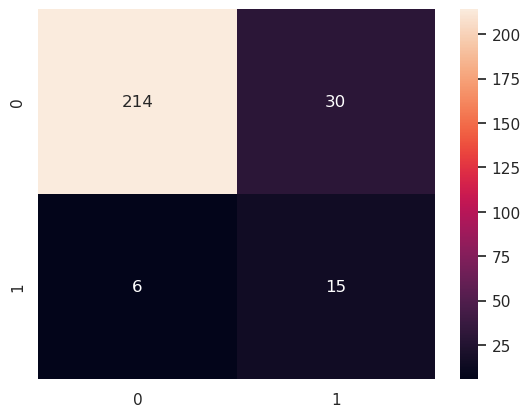

In [68]:
#Target
target_col = 'Response'
feature_cols = [c for c in df.columns if c != target_col]

X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Oversample the training data using RandomOverSampler
ros = RandomOverSampler(random_state=5)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Define the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('clf', SVC(kernel='linear', probability=True))])

# Define the parameter grid
param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__gamma': [0.1, 1, 10]
}

# Instantiate the GridSearchCV object
grid = GridSearchCV(pipe, param_grid, cv=5)

# Fit the model on the training data
grid.fit(X_train, y_train)

# Get the best estimator from the grid search
svc_model = grid.best_estimator_

# Calculate accuracy for train dataset
train_pred = svc_model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)

# Calculate accuracy for test dataset
test_pred = svc_model.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)

print('SVC Model heatmap and report:------------------------------------------------------')

print('Accuracy on train dataset:', train_acc)
print('Accuracy on test dataset:', test_acc)

cm = confusion_matrix(y_test, test_pred)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, test_pred))


knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Target
target_col = 'Response'
feature_cols = [c for c in df.columns if c != target_col]

X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Oversample the training data using RandomOverSampler
ros = RandomOverSampler(random_state=5)
X_train, y_train = ros.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_standard = scaler.fit_transform(X_train)
X_standard_test = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Calculate accuracy for train dataset
train_pred = knn_model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)

# Calculate accuracy for test dataset
test_pred = knn_model.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)

print('K-nearest neighbors Model heatmap and report:------------------------------------------------------')

print('Accuracy on train dataset:', train_acc)
print('Accuracy on test dataset:', test_acc)

cm = confusion_matrix(y_test, test_pred)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, test_pred))

#### Checking the results.

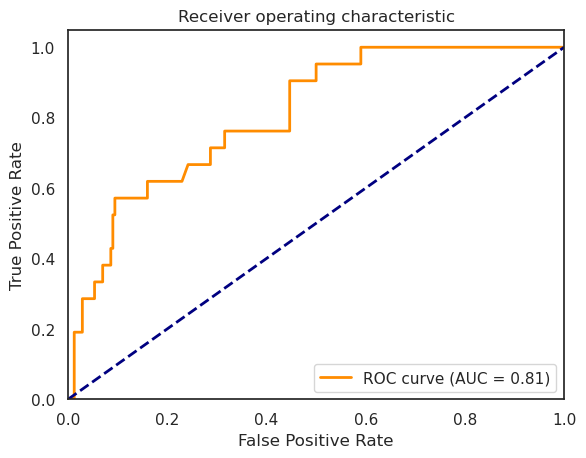

In [64]:
# Predict class probabilities for test data
y_prob = lin_model.predict_proba(X_test)[:, 1]
y_prob = svc_model.predict_proba(X_test)[:, 1]



# Calculate false positive rate and true positive rate at various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
